In [ ]:
This Jupyter Notebook demonstrates the implementation of a Gaussian Mixture Model (GMM) using the Expectation-Maximization (EM) algorithm. The notebook includes data preprocessing, initialization of parameters, the EM algorithm steps (E-step and M-step), and visualization of the results.

Main Concepts:
1. Data Loading and Preprocessing:
    - The dataset 'faithful.csv' is loaded and the relevant features are extracted.

2. Initialization:
    - The initial parameters (means, variances, and mixing coefficients) for the GMM are initialized.

3. Expectation-Maximization (EM) Algorithm:
    - E-step: Calculate the responsibilities (probabilities) for each data point belonging to each component.
    - M-step: Update the parameters (means, variances, and mixing coefficients) based on the responsibilities.

4. Log-Likelihood Calculation:
    - The log-likelihood of the data given the current parameters is calculated to monitor the convergence of the algorithm.

5. Model Training:
    - The GMM is trained over multiple iterations until convergence, and the results are stored.

6. Visualization:
    - The number of iterations required for convergence is visualized using a histogram.
    - The trajectories of the means of the Gaussian components are plotted to show how they evolve over iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('faithful.csv')
X = df[['eruptions', 'waiting']].values

In [3]:
def init(X, n_comps=2):
    n_s, n_f = X.shape
    mus = np.random.randn(n_comps, n_f) * np.std(X, axis=0) + np.mean(X, axis=0)
    sigmas = np.ones(n_comps) * np.var(X)
    pis = np.ones(n_comps) / n_comps
    return mus, sigmas, pis

In [4]:
def m_st(X, r):
    n_comps = r.shape[1]
    n_s = X.shape[0]
    n_f = X.shape[1]
    mus = np.zeros((n_comps, n_f))
    sigmas = np.zeros(n_comps)
    pis = np.zeros(n_comps)
    for k in range(n_comps):
        r_sum = np.sum(r[:, k])
        mus[k] = np.sum(r[:, k].reshape(-1, 1) * X, axis=0) / r_sum
        sigmas[k] = np.sum(r[:, k] * np.sum((X - mus[k])**2, axis=1)) / (r_sum * n_f)
        pis[k] = r_sum / n_s
    return mus, sigmas, pis

In [5]:
def e_st(X, mus, sigmas, pis):
    n_comps = mus.shape[0]
    n_s = X.shape[0]
    r = np.zeros((n_s, n_comps))
    for k in range(n_comps):
        diff = X - mus[k]
        exp = -0.5 * np.sum(diff**2, axis=1) / sigmas[k]
        r[:, k] = pis[k] * np.exp(exp) / np.sqrt(2 * np.pi * sigmas[k])
    r /= r.sum(axis=1, keepdims=True)
    return r

In [6]:
def ll(X, mus, sigmas, pis):
    n_comps = mus.shape[0]
    ll_val = 0
    for k in range(n_comps):
        diff = X - mus[k]
        exp = -0.5 * np.sum(diff**2, axis=1) / sigmas[k]
        lik = pis[k] * np.exp(exp) / np.sqrt(2 * np.pi * sigmas[k])
        ll_val += lik
    return np.sum(np.log(ll_val))

In [7]:
def gmm_model(X, n_comps=2, max_iter=100, tol=1e-4):
    mus, sigmas, pis = init(X, n_comps)
    ll_hist = []
    mean_traj = [mus.copy()]
    for it in range(max_iter):
        r = e_st(X, mus, sigmas, pis)
        mus, sigmas, pis = m_st(X, r)
        mean_traj.append(mus.copy())
        curr_ll = ll(X, mus, sigmas, pis)
        ll_hist.append(curr_ll)
        if it > 0 and abs(ll_hist[-1] - ll_hist[-2]) < tol:
            break
    return mus, sigmas, pis, ll_hist, mean_traj, it

In [8]:
iter_hist = []
mean_traj_hist = []

In [9]:
for _ in range(50):
    mus, sigmas, pis, ll_hist, mean_traj, num_iter = gmm_model(X)
    iter_hist.append(num_iter)
    mean_traj_hist.append(mean_traj)

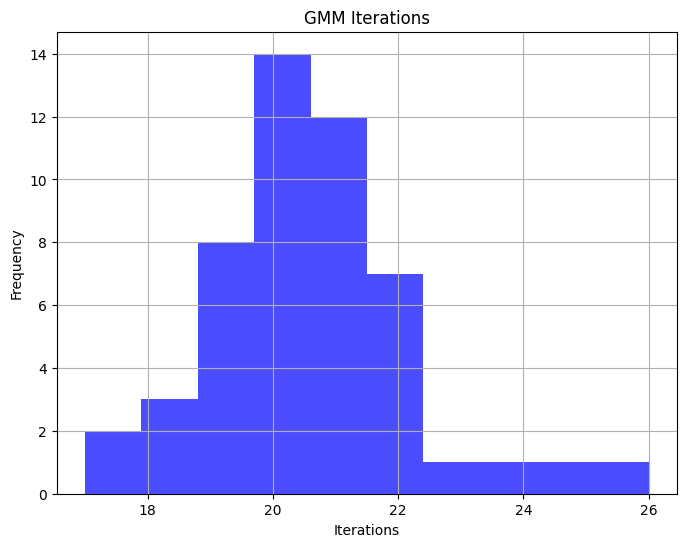

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(iter_hist, bins=10, color='b', alpha=0.7)
plt.title('GMM Iterations')
plt.xlabel('Iterations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
mean_traj = np.array(mean_traj_hist[0])
mean_x = mean_traj[:, 0, :]
mean_y = mean_traj[:, 1, :]

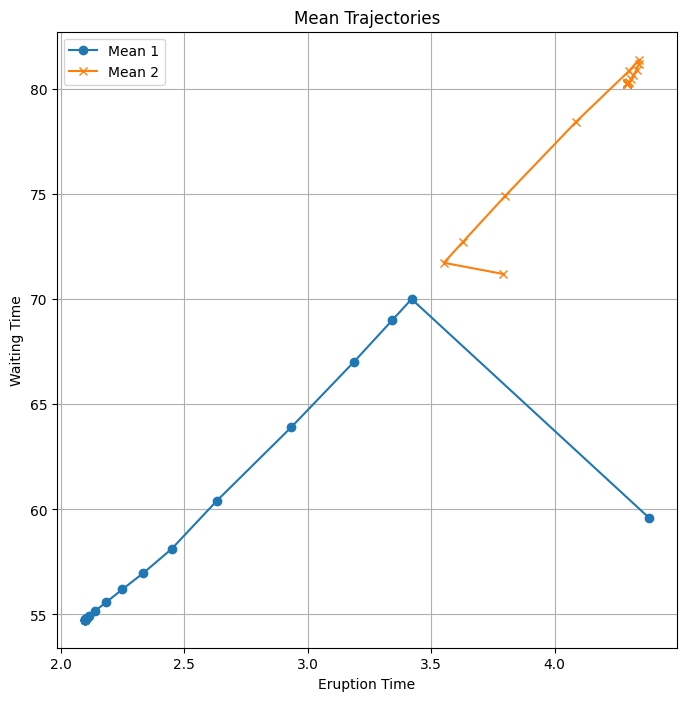

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(mean_x[:, 0], mean_x[:, 1], 'o-', label='Mean 1')
plt.plot(mean_y[:, 0], mean_y[:, 1], 'x-', label='Mean 2')
plt.title('Mean Trajectories')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.legend()
plt.grid(True)
plt.show()